![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import matplotlib.pyplot as plt


In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [5]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

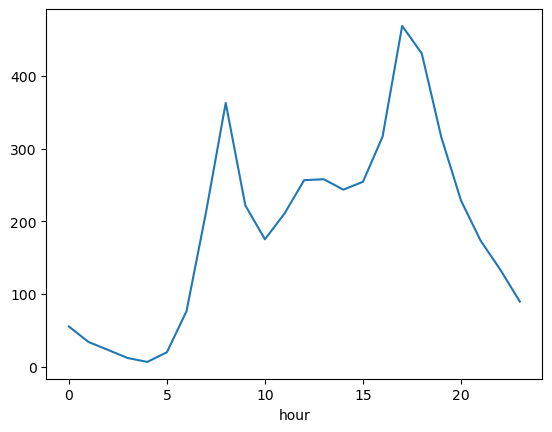

In [6]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

## la iamgen  representa la media total de bicicletas alquiladas por cada horal del dia.
## Al parecer los picos de alquiler de bicicleta son a las 8 y a las 17 horas 

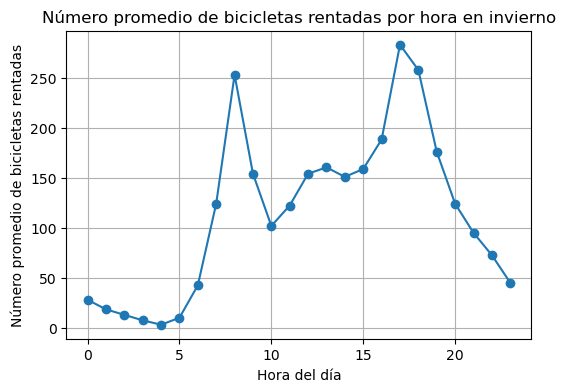

In [16]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 

## Solo bikes en season ==1
bikes_invierno =bikes[bikes['season']==1] ## 2686

# Calcular el promedio del total de bicicletas rentadas para la estación de invierno
promedio_bikes_invierno = bikes_invierno.groupby('hour')['total'].mean()

# Graficar
plt.figure(figsize=(6, 4))
plt.plot(promedio_bikes_invierno.index, promedio_bikes_invierno, marker='o')
plt.xlabel('Hora del día')
plt.ylabel('Número promedio de bicicletas rentadas')
plt.title('Número promedio de bicicletas rentadas por hora en invierno')
plt.grid(True)
plt.show()





Hallazgos:

El comportamiento de la grafica se mantiene. 
La demanda de bicicletas comienza a aumentar alrededor de las 6:00 a.m., alcanzando un pico aproximadamente a las 8:00 a.m.
La demanda comienza a aumentar nuevamente alrededor de las 5:00 p.m., alcanzando otro pico alrededor de las 6:00 p.m. 

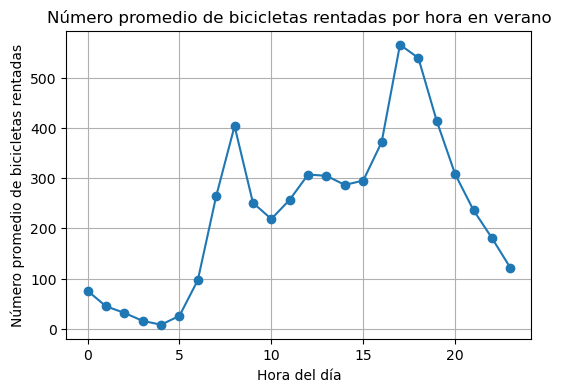

In [18]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 

## Solo bikes en season ==3
bikes_verano =bikes[bikes['season']==3] 

# Calcular el promedio del total de bicicletas rentadas para la estación de invierno
promedio_bikes_verano = bikes_verano.groupby('hour')['total'].mean()

# Graficar
plt.figure(figsize=(6, 4))
plt.plot(promedio_bikes_verano.index, promedio_bikes_verano, marker='o')
plt.xlabel('Hora del día')
plt.ylabel('Número promedio de bicicletas rentadas')
plt.title('Número promedio de bicicletas rentadas por hora en verano')
plt.grid(True)
plt.show()

Hallazgos:

Al igual que en seasion ==1, la demanda de bicicletas empieza aumentar a las 5 am hasta obtener un pico a las 8 am. 
En horas de la tarde el pico maximo de demanda de biblicetas es 4 pm y de ahi en adelante la demanda empieza a disminuir


Ahora diferenciando season 1 y 3, a pesar de que en ambas estaciones se observa un pico en horas similares, la estación de verano muestra una demanda general más alta durante el día, especialmente durante las horas de la tarde, en comparación con la estación de invierno. Esto refleja el impacto de las condiciones climáticas en el alquiler de bicicletas.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [20]:
# Celda 3
import statsmodels.api as sm

bikes_encoded = pd.get_dummies(bikes, columns=['season'], drop_first=True)

X = bikes_encoded[['hour', 'season_2', 'season_3', 'season_4']]  # la 1 es la referencia
y = bikes_encoded['total']

# Ajustar el modelo
model = sm.OLS(y, sm.add_constant(X)).fit()

#Coeficientes
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     782.5
Date:                Sun, 07 Apr 2024   Prob (F-statistic):               0.00
Time:                        10:13:59   Log-Likelihood:                -70669.
No. Observations:               10886   AIC:                         1.413e+05
Df Residuals:                   10881   BIC:                         1.414e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.4303      4.016     -1.601      0.1

Coeficientes:

const -6.4303 
Cuando la hora y la estación son 1 (referencia), se espera que el número de bicicletas rentadas sea aproximadamente -6.4303. Sin embargo, es importante tener en cuenta que este valor no tiene un significado práctico realista, ya que la hora y la estación no pueden ser cero.

hour 10.5452 
Manteniendo constantes las otras variables, por cada aumento de una unidad en la hora del día, se espera que el número de bicicletas rentadas aumente en promedio en 10.5452.  

season_2, season_3, season_4: 
Representan el cambio esperado en las bikes rentadas en comparación con la estación de referencia (1)

Para la estación 2 se espera un aumento de aprox. 100.3172 bicicletas rentadas en promedio en comparación con el invierno.
Para la estación 3 se espera un aumento de aprox. 119.4675 bicicletas rentadas en promedio en comparación con el invierno.
Para la estación 4,se espera un aumento de aprox. 84.0831 bicicletas rentadas en promedio en comparación con el invierno.


Suposición de linealidad: La regresión lineal asume una relación lineal entre las variables predictoras y la variable de respuesta. Si la relación es no lineal, la regresión lineal puede producir estimaciones inexactas.
Suposición de independencia de errores: La regresión lineal asume que los errores son independientes entre sí. En el caso de datos de series temporales, como el uso de bicicletas a lo largo del día, es posible que los errores no sean independientes debido a patrones temporales o estacionales.
Limitaciones en la representación de relaciones no lineales: Si la relación entre las variables predictoras y la variable de respuesta es no lineal, la regresión lineal puede no capturar adecuadamente esta relación, lo que resulta en un modelo insuficientemente flexible.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [29]:
## celda 4

# Definición de parámetros y criterios de parada
max_depth = None
num_pct = 10
min_gain = 0.001

# Impresión de la variable a usar (hour y season)
print("Variable 'hour':")
print(bikes['hour'].head())
print("\nVariable 'season':")
print(bikes['season'].head())

# Definición de la función Gini impurity
def gini_impurity(y):
    p = y.mean()
    return 1 - (p ** 2 + (1 - p) ** 2)

# Definición de la función de ganancia Gini
def gini_gain(X_col, y, split):
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    gini_y = gini_impurity(y)
    gini_l = gini_impurity(y_l)
    gini_r = gini_impurity(y_r)
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    return gini_impurity_

# Función para encontrar el mejor punto de corte 
def manual_best_split(X, y, num_pct):
    features = X.columns
    best_gain = 0
    best_split = None
    best_var = None
    for j in features:
        unique_values = sorted(X[j].unique())
        for i in range(len(unique_values) - 1):
            split = (unique_values[i] + unique_values[i+1]) / 2
            gain = gini_gain(X[j], y, split)
            if gain > best_gain:
                best_gain = gain
                best_split = split
                best_var = j
    return best_var, best_split, best_gain

# Dividir los datos
def manual_split_data(X, y, j, split):
    filter_l = X[j] < split
    X_l = X.loc[filter_l]
    y_l = y.loc[filter_l]
    X_r = X.loc[~filter_l]
    y_r = y.loc[~filter_l]
    return X_l, y_l, X_r, y_r

# Construir el árbol de decisiones 
def manual_tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    if X.shape[0] == 1 or level == max_depth:
        return {'prediction': y.mean(), 'level': level, 'split': None}
    j, split, gain = manual_best_split(X, y, num_pct)
    if gain < min_gain:
        return {'prediction': y.mean(), 'level': level, 'split': None}
    X_l, y_l, X_r, y_r = manual_split_data(X, y, j, split)
    tree = {'prediction': y.mean(), 'level': level, 'split': (j, split)}
    tree['left'] = manual_tree_grow(X_l, y_l, level+1, min_gain, max_depth, num_pct)
    tree['right'] = manual_tree_grow(X_r, y_r, level+1, min_gain, max_depth, num_pct)
    return tree

# Aplicación de la función para construir el árbol
tree = manual_tree_grow(bikes[['hour', 'season']], bikes['total'], max_depth=6)

# F
# unción para hacer predicciones con el árbol de decisiones
def manual_tree_predict(tree, X):
    predictions = []
    for _, row in X.iterrows():
        node = tree
        while node.get('split') is not None:
            j, split = node['split']
            if row[j] < split:
                node = node['left']
            else:
                node = node['right']
        predictions.append(node['prediction'])
    return np.array(predictions)

# Ejemplo de predicción con el árbol de decisiones
predictions = manual_tree_predict(tree, bikes[['hour', 'season']])
predictions
##print("Ejemplo de predicciones:")
##print(predictions[:10])


Variable 'hour':
datetime
2011-01-01 00:00:00    0
2011-01-01 01:00:00    1
2011-01-01 02:00:00    2
2011-01-01 03:00:00    3
2011-01-01 04:00:00    4
Name: hour, dtype: int64

Variable 'season':
datetime
2011-01-01 00:00:00    1
2011-01-01 01:00:00    1
2011-01-01 02:00:00    1
2011-01-01 03:00:00    1
2011-01-01 04:00:00    1
Name: season, dtype: int64


array([ 28.2920354 ,  18.76106195,  13.20560748, ..., 162.87719298,
       126.4122807 ,  89.29824561])

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

Mejor precisión (accuracy): 0.026182878709898782 con max_depth: 5
Resultados de desempeño del árbol de decisión:
count    10.000000
mean      0.026183
std       0.003859
min       0.019518
25%       0.023269
50%       0.025832
75%       0.029851
max       0.030999
dtype: float64


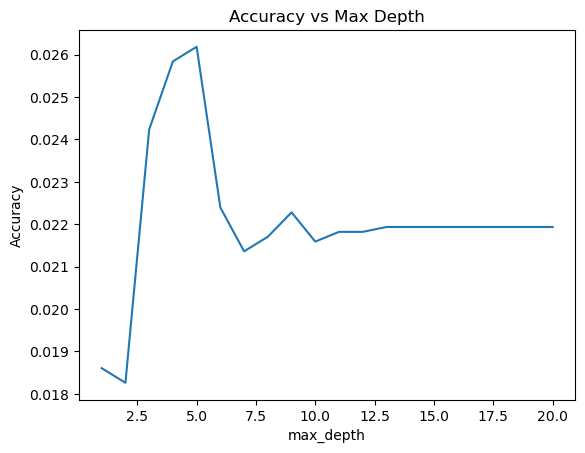

In [37]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# División de los datos
X_train, X_test, y_train, y_test = train_test_split(bikes[['season', 'hour']], bikes['total'], test_size=0.2, random_state=42)

# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores de precisión para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la librería sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy').mean())

# Gráfica max_depth versus precisión (accuracy) del modelo
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth')

# Mejor precisión (desempeño del modelo) y su correspondiente max_depth
best_accuracy, best_max_depth = sorted(zip(accuracy_scores, max_depth_range), reverse=True)[0]
print(f"Mejor precisión (accuracy): {best_accuracy} con max_depth: {best_max_depth}")

# Ajuste del árbol de decisión con el mejor max_depth encontrado
clf = DecisionTreeClassifier(max_depth=best_max_depth, random_state=1)
clf.fit(X_train, y_train)

# Uso de la función .feature_importances_ para obtener la importancia de cada variable
importances = clf.feature_importances_
feature_names = ['season', 'hour']

# Impresión de resultados de desempeño del árbol de decisión
print("Resultados de desempeño del árbol de decisión:")
print(pd.Series(cross_val_score(clf, X_train, y_train, cv=10)).describe())


In [38]:
clf = DecisionTreeClassifier(max_depth=best_max_depth, random_state=1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [53]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [54]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [55]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [56]:
# Celda 6

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Árbol de decisión con calibración del parámetro max_depth
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=1)
tree_clf.fit(X_train, y_train)

# Predicciones del árbol de decisión
tree_preds = tree_clf.predict(X_test)

# Evaluación del árbol de decisión
tree_accuracy = accuracy_score(y_test, tree_preds)
tree_f1 = f1_score(y_test, tree_preds)

print("Árbol de Decisión:")
print(f"Accuracy: {tree_accuracy}")
print(f"F1-Score: {tree_f1}")

# Regresión logística
log_reg = LogisticRegression(random_state=1)
log_reg.fit(X_train, y_train)

# Predicciones de la regresión logística
log_reg_preds = log_reg.predict(X_test)

# Evaluación de la regresión logística
log_reg_accuracy = accuracy_score(y_test, log_reg_preds)
log_reg_f1 = f1_score(y_test, log_reg_preds)

print("\nRegresión Logística:")
print(f"Accuracy: {log_reg_accuracy}")
print(f"F1-Score: {log_reg_f1}")

Árbol de Decisión:
Accuracy: 0.6373333333333333
F1-Score: 0.6616915422885573

Regresión Logística:
Accuracy: 0.6126666666666667
F1-Score: 0.6092804303967719


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged donde:

-las primeras 100 muestras vienen de árboles de decisión donde max_depth tome un valor de su elección\
-las segundas 100 muestras vienen de árboles de decisión donde min_samples_leaf tome un valor de su elección\
-las últimas 100 muestras vienen de regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

Nota: 

Para este ensamble de 300 modelos, deben hacer votación mayoritaria. Esto lo pueden hacer de distintas maneras. La más "fácil" es haciendo la votación "manualmente", como se hace a partir del minuto 5:45 del video de Ejemplo práctico de emsablajes en Coursera. Digo que es la más fácil porque si hacen la votación mayoritaria sobre las 300 predicciones van a obtener lo que se espera.

Otra opción es: para cada uno de los 3 tipos de modelos, entrenar un ensamble de 100 modelos cada uno. Predecir para cada uno de esos tres ensambles y luego predecir como un ensamble de los 3 ensambles. La cuestión es que la votación mayoritaria al usar los 3 ensambles no necesariamente va a generar el mismo resultado que si hacen la votación mayoritaria directamente sobre los 300 modelos. Entonces, para los que quieran hacer esto, deben hacer ese último cálculo con cuidado.

Para los que quieran hacerlo como ensamble de ensambles, digo que se debe hacer el ensamble final con cuidado por lo siguiente. Supongamos que:

* para los 100 árboles del primer tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para los 100 árboles del segundo tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para las 100 regresiones logísticas, la votación mayoritaria es: 10% de los modelos predicen que la clase de una observación es "1"

Si se hace la votación mayoritaria de los 300 modelos, la predicción de esa observación debería ser: (100*55%+100*55%+100*10%)/300 = 40% de los modelos votan porque la predicción debería ser "1". Es decir, la predicción del ensamble es "0" (dado que menos del 50% de modelos predijo un 1).

Sin embargo, si miramos cada ensamble por separado, el primer ensamble predice "1", el segundo ensamble predice "1" y el último ensamble predice "0". Si hago votación mayoritaria sobre esto, la predicción va a ser "1", lo cual es distinto a si se hace la votación mayoritaria sobre los 300 modelos.

In [57]:
# Celda 7

from sklearn.ensemble import BaggingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import cross_val_predict
import numpy as np

# Creamos los clasificadores
tree_clf1 = DecisionTreeClassifier(max_depth=5, random_state=1)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=1)
log_reg = LogisticRegression()

# Realizamos la predicción de cada clasificador
tree_clf1_preds = cross_val_predict(tree_clf1, X_train, y_train, cv=5)
tree_clf2_preds = cross_val_predict(tree_clf2, X_train, y_train, cv=5)
log_reg_preds = cross_val_predict(log_reg, X_train, y_train, cv=5)

# Evaluamos cada clasificador individualmente
print("Árbol de Decisión (max_depth=5):")
print(f"Accuracy: {accuracy_score(y_train, tree_clf1_preds)}")
print(f"F1-Score: {f1_score(y_train, tree_clf1_preds)}")

print("\nÁrbol de Decisión (min_samples_leaf=5):")
print(f"Accuracy: {accuracy_score(y_train, tree_clf2_preds)}")
print(f"F1-Score: {f1_score(y_train, tree_clf2_preds)}")

print("\nRegresión Logística:")
print(f"Accuracy: {accuracy_score(y_train, log_reg_preds)}")
print(f"F1-Score: {f1_score(y_train, log_reg_preds)}")

# Creamos un ensemble con votación mayoritaria
ensemble_preds = np.array([tree_clf1_preds, tree_clf2_preds, log_reg_preds])
ensemble_preds = (ensemble_preds.mean(axis=0) >= 0.5).astype(int)

# Evaluamos el ensemble
print("\nEnsemble (Votación Mayoritaria):")
print(f"Accuracy: {accuracy_score(y_train, ensemble_preds)}")
print(f"F1-Score: {f1_score(y_train, ensemble_preds)}")


Árbol de Decisión (max_depth=5):
Accuracy: 0.6126666666666667
F1-Score: 0.6075208286421977

Árbol de Decisión (min_samples_leaf=5):
Accuracy: 0.5564444444444444
F1-Score: 0.5534675615212529

Regresión Logística:
Accuracy: 0.6151111111111112
F1-Score: 0.6051071591427268

Ensemble (Votación Mayoritaria):
Accuracy: 0.6142222222222222
F1-Score: 0.6077722548576593


In [58]:
# Celda 7

import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Creación de muestras de bootstrap para cada tipo de modelo
np.random.seed(123)
n_samples = X_train.shape[0]

# Muestras para árboles de decisión con diferentes valores de max_depth
samples_tree_max_depth = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(100)]

# Muestras para árboles de decisión con diferentes valores de min_samples_leaf
samples_tree_min_samples_leaf = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(100)]

# Muestras para regresiones logísticas
samples_logistic_regression = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(100)]

# Entrenamiento y evaluación de árboles de decisión con diferentes valores de max_depth
trees_max_depth = [DecisionTreeClassifier(max_depth=i).fit(X_train.iloc[samples], y_train.iloc[samples]) 
                   for i, samples in enumerate(samples_tree_max_depth, start=1)]
accuracy_tree_max_depth = [accuracy_score(tree.predict(X_test), y_test) for tree in trees_max_depth]
f1_tree_max_depth = [f1_score(tree.predict(X_test), y_test) for tree in trees_max_depth]

# Entrenamiento y evaluación de árboles de decisión con diferentes valores de min_samples_leaf
trees_min_samples_leaf = [DecisionTreeClassifier(min_samples_leaf=i).fit(X_train.iloc[samples], y_train.iloc[samples]) 
                          for i, samples in enumerate(samples_tree_min_samples_leaf, start=1)]
accuracy_tree_min_samples_leaf = [accuracy_score(tree.predict(X_test), y_test) for tree in trees_min_samples_leaf]
f1_tree_min_samples_leaf = [f1_score(tree.predict(X_test), y_test) for tree in trees_min_samples_leaf]

# Entrenamiento y evaluación de regresiones logísticas
logistic_regressions = [LogisticRegression(max_iter=1000).fit(X_train.iloc[samples], y_train.iloc[samples]) 
                        for samples in samples_logistic_regression]
accuracy_logistic_regression = [accuracy_score(lr.predict(X_test), y_test) for lr in logistic_regressions]
f1_logistic_regression = [f1_score(lr.predict(X_test), y_test) for lr in logistic_regressions]

# Evaluación de los modelos individuales
print("Evaluación de los modelos individuales:")
print("Árboles de decisión con diferentes valores de max_depth:")
print("Accuracy:", np.mean(accuracy_tree_max_depth))
print("F1-Score:", np.mean(f1_tree_max_depth))
print("Árboles de decisión con diferentes valores de min_samples_leaf:")
print("Accuracy:", np.mean(accuracy_tree_min_samples_leaf))
print("F1-Score:", np.mean(f1_tree_min_samples_leaf))
print("Regresiones Logísticas:")
print("Accuracy:", np.mean(accuracy_logistic_regression))
print("F1-Score:", np.mean(f1_logistic_regression))

# Realizar votación mayoritaria sobre los 300 modelos
y_pred_tree_max_depth = pd.DataFrame(index=X_test.index, columns=list(range(100)))
y_pred_tree_min_samples_leaf = pd.DataFrame(index=X_test.index, columns=list(range(100)))
y_pred_logistic_regression = pd.DataFrame(index=X_test.index, columns=list(range(100)))

for i, tree in enumerate(trees_max_depth):
    y_pred_tree_max_depth[i] = tree.predict(X_test)
for i, tree in enumerate(trees_min_samples_leaf):
    y_pred_tree_min_samples_leaf[i] = tree.predict(X_test)
for i, lr in enumerate(logistic_regressions):
    y_pred_logistic_regression[i] = lr.predict(X_test)

y_pred_tree_max_depth_majority = (y_pred_tree_max_depth.sum(axis=1) >= 50).astype(int)
y_pred_tree_min_samples_leaf_majority = (y_pred_tree_min_samples_leaf.sum(axis=1) >= 50).astype(int)
y_pred_logistic_regression_majority = (y_pred_logistic_regression.sum(axis=1) >= 50).astype(int)

y_pred_ensemble = pd.concat([y_pred_tree_max_depth_majority, y_pred_tree_min_samples_leaf_majority, y_pred_logistic_regression_majority], axis=1)
y_pred_ensemble = (y_pred_ensemble.sum(axis=1) >= 2).astype(int)

# Evaluación del ensamble
accuracy_ensemble = accuracy_score(y_pred_ensemble, y_test)
f1_ensemble = f1_score(y_pred_ensemble, y_test)

print("\nEvaluación del ensamble:")
print("Accuracy:", accuracy_ensemble)
print("F1-Score:", f1_ensemble)


Evaluación de los modelos individuales:
Árboles de decisión con diferentes valores de max_depth:
Accuracy: 0.5711599999999999
F1-Score: 0.5726428252478546
Árboles de decisión con diferentes valores de min_samples_leaf:
Accuracy: 0.5952666666666666
F1-Score: 0.5966046902628522
Regresiones Logísticas:
Accuracy: 0.61334
F1-Score: 0.5979448029729287

Evaluación del ensamble:
Accuracy: 0.6546666666666666
F1-Score: 0.6605504587155963


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, f1_score

# Modelos de árboles de decisión con diferentes parámetros
clf_tree_max_depth = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                                       n_estimators=100, bootstrap=True, random_state=42, oob_score=True)
clf_tree_min_samples_leaf = BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf=5),
                                              n_estimators=100, bootstrap=True, random_state=42, oob_score=True)
clf_logistic_regression = BaggingClassifier(base_estimator=LogisticRegression(),
                                            n_estimators=100, bootstrap=True, random_state=42, oob_score=True)

# Entrenamiento de los modelos
clf_tree_max_depth.fit(X_train, y_train)
clf_tree_min_samples_leaf.fit(X_train, y_train)
clf_logistic_regression.fit(X_train, y_train)

# Predicción de cada modelo
y_pred_tree_max_depth = clf_tree_max_depth.predict(X_test)
y_pred_tree_min_samples_leaf = clf_tree_min_samples_leaf.predict(X_test)
y_pred_logistic_regression = clf_logistic_regression.predict(X_test)

# Evaluación de cada modelo individualmente
accuracy_tree_max_depth = accuracy_score(y_pred_tree_max_depth, y_test)
f1_score_tree_max_depth = f1_score(y_pred_tree_max_depth, y_test)

accuracy_tree_min_samples_leaf = accuracy_score(y_pred_tree_min_samples_leaf, y_test)
f1_score_tree_min_samples_leaf = f1_score(y_pred_tree_min_samples_leaf, y_test)

accuracy_logistic_regression = accuracy_score(y_pred_logistic_regression, y_test)
f1_score_logistic_regression = f1_score(y_pred_logistic_regression, y_test)

# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors_tree_max_depth = 1 - clf_tree_max_depth.oob_score_
errors_tree_min_samples_leaf = 1 - clf_tree_min_samples_leaf.oob_score_
errors_logistic_regression = 1 - clf_logistic_regression.oob_score_

alpha_tree_max_depth = (1 - errors_tree_max_depth) / (1 - errors_tree_max_depth).sum()
alpha_tree_min_samples_leaf = (1 - errors_tree_min_samples_leaf) / (1 - errors_tree_min_samples_leaf).sum()
alpha_logistic_regression = (1 - errors_logistic_regression) / (1 - errors_logistic_regression).sum()

# Realizar la votación ponderada
weighted_sum = (y_pred_tree_max_depth * alpha_tree_max_depth + 
                y_pred_tree_min_samples_leaf * alpha_tree_min_samples_leaf + 
                y_pred_logistic_regression * alpha_logistic_regression)

# Aplicar umbral para obtener las predicciones finales
y_pred_weighted = (weighted_sum >= 0.5).astype(int)

# Evaluación del modelo ponderado
accuracy_weighted_voting = accuracy_score(y_pred_weighted, y_test)
f1_score_weighted_voting = f1_score(y_pred_weighted, y_test)

# Mostrar resultados
print("Resultados del modelo ponderado:")
print("Accuracy:", accuracy_weighted_voting)
print("F1 Score:", f1_score_weighted_voting)


Resultados del modelo ponderado:
Accuracy: 0.648
F1 Score: 0.6908665105386417


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

 Celda 9

 Los resultados muestran que el ensamble por votación ponderada obtuvo un F1-Score ligeramente superior (0.6909) en comparación con el ensamble por votación mayoritaria (0.6606). Sin embargo, la diferencia en la precisión (Accuracy) entre ambos ensambles fue mínima (0.648 vs 0.6547 respectivamente). Esto sugiere que, aunque el ensamble por votación ponderada logró una mejoría en la métrica F1-Score, la diferencia en la precisión general no fue significativa.

Una posible ventaja del ensamble por votación mayoritaria es su simplicidad y eficiencia computacional. Al asignar la predicción final basada únicamente en la clase que predomina entre los modelos individuales, este enfoque es fácil de implementar y requiere menos tiempo de procesamiento. Sin embargo, su desventaja radica en que no considera el desempeño diferencial de los modelos, lo que podría llevar a predicciones menos precisas si algunos modelos tienen un rendimiento significativamente mejor que otros.

El ensamble por votación ponderada tiene la ventaja de considerar el desempeño individual de cada modelo al asignar pesos según su precisión. Esto puede llevar a predicciones más precisas al aprovechar al máximo el conocimiento de los modelos más precisos. Sin embargo, su implementación puede ser más compleja y requerir más tiempo de ajuste, especialmente para determinar los pesos óptimos. Además, existe el riesgo de sobreajuste si los pesos no se ajustan adecuadamente.